In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from utils import get_day_to_day, get_normalized_day_to_day

In [2]:
import yfinance

In [3]:
data = pd.read_csv('sp500.csv')
data

,date,MMM,AOS,ABT,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WU,WY,WHR,WMB,WYNN,XEL,YUM,ZBRA,ZBH,ZION
0,2010-01-04 00:00:00-05:00,55.856255,6.086544,19.336399,8.740000,32.708164,10.018280,22.260666,37.090000,36.703842,...,12.048526,10.191541,56.303394,8.963634,41.868591,13.396955,19.435677,28.670000,52.993622,10.851063
1,2010-01-05 00:00:00-05:00,55.506397,6.008774,19.180183,8.530000,32.910297,10.036011,22.380920,37.700001,36.485699,...,11.998034,10.407894,56.186611,9.075632,44.415005,13.238073,19.369209,28.620001,54.671215,11.233655
2,2010-01-06 00:00:00-05:00,56.293568,6.011502,19.286695,8.400000,33.260159,9.982815,22.324335,37.619999,36.803848,...,11.991720,10.292816,55.691925,9.370129,43.832409,13.263491,19.230738,28.400000,54.653557,12.210492
3,2010-01-07 00:00:00-05:00,56.333950,6.029240,19.446470,8.400000,33.229057,9.743441,22.090897,36.889999,36.794754,...,12.376720,10.246784,56.887375,9.303763,44.768490,13.206299,19.225203,27.690001,55.907322,13.578069
4,2010-01-08 00:00:00-05:00,56.730900,6.117925,19.545883,8.230000,33.096889,9.663649,21.815037,36.689999,36.940178,...,12.496638,10.152419,58.096584,9.378423,44.447746,13.212653,19.230738,27.600000,54.733025,13.358277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2019-12-24 00:00:00-05:00,153.971359,44.487289,82.433830,172.300003,201.337601,57.800648,42.223671,329.640015,149.564819,...,22.915079,25.980843,127.978729,19.304476,137.966171,57.497875,94.112907,254.330002,142.686539,45.947033
2512,2019-12-26 00:00:00-05:00,153.892914,44.712059,82.433830,171.009995,201.756226,57.879272,42.333626,331.200012,148.353851,...,23.101315,26.102694,127.987549,19.280180,139.450317,57.433834,95.482430,254.419998,142.373947,46.062954
2513,2019-12-27 00:00:00-05:00,154.476837,44.777630,82.547188,169.270004,201.917984,58.174122,42.425262,330.790009,147.496933,...,23.169037,26.093987,128.631073,19.102039,138.332260,57.735687,95.585609,256.000000,142.099243,45.920292
2514,2019-12-30 00:00:00-05:00,153.230606,44.552853,81.980492,167.289993,200.414658,57.869442,42.260319,328.339996,148.214157,...,22.669592,26.050472,128.895523,18.786230,137.906815,57.891193,94.403687,254.110001,140.905670,46.161030


In [4]:
#check if there is any nan value
#print where is the nan value
# print(data.isnull())
n_cols = data.shape[1]
for column in data.columns:
    if data[column].isnull().values.any():
        n_cols -= 1
print("There are {} columns with nan values".format(n_cols))

There are 4 columns with nan values


In [4]:
day_to_day_df = {'date': data['date']}
for col in data.columns[1:]:
    day_to_day_df[col] = get_normalized_day_to_day(data[col].values)
#defragment
day_to_day_df = pd.DataFrame(day_to_day_df)

In [5]:
skews = {}
kurtosis = {}
for col in day_to_day_df.columns[1:]:
    day_to_day = day_to_day_df[col]
    #drop nan
    day_to_day = day_to_day[~np.isnan(day_to_day)]
    skews[col] = stats.skew(day_to_day)
    kurtosis[col] = stats.kurtosis(day_to_day)

Top 4 most skewed:
1: CXO - 0.0021451301022152834
(1259,)
2: AMGN - 0.006043289755559897
(1259,)
3: CVX - 0.008443195884920861
(1259,)
4: AAPL - 0.011959967520189433
(1259,)


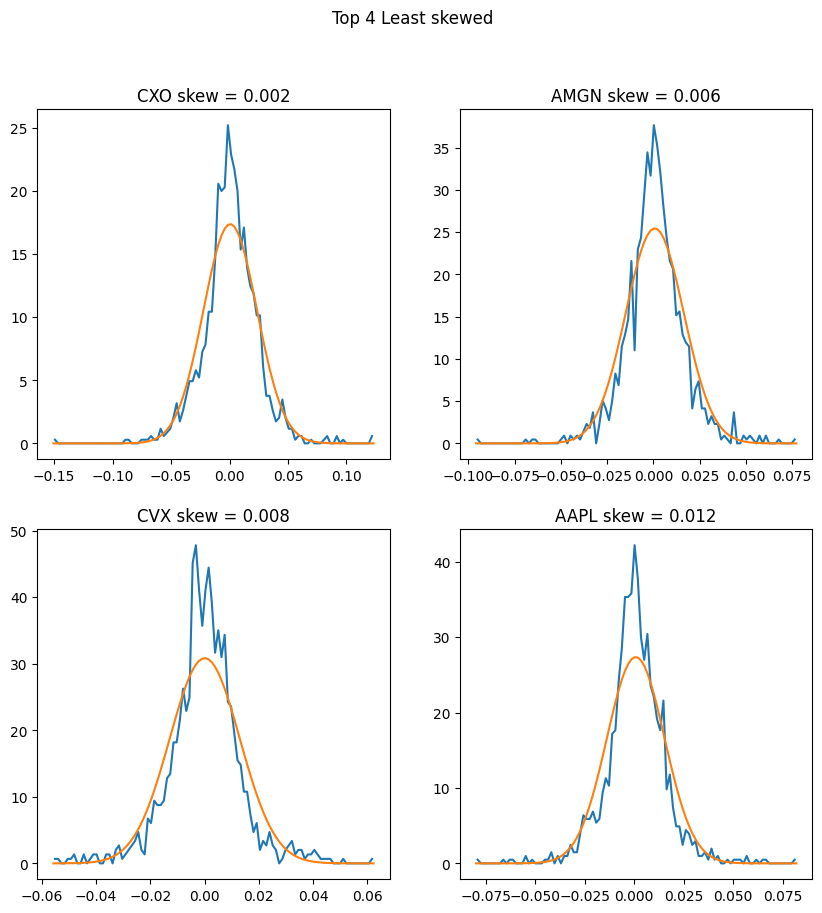

In [35]:
top_n = 4
fig,axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Top {} Least skewed'.format(top_n))
#print the top_n most skewed
print('Top {} most skewed:'.format(top_n))
for i, (k, v) in enumerate(sorted(skews.items(), key=lambda x: abs(x[1]), reverse=False)):
    if i < top_n:
        print('{}: {} - {}'.format(i+1, k, v))
        #plot the distribution
        plt.sca(axs[i//2][i%2])
        data = day_to_day_df[k]
        data = data[~np.isnan(data)]
        print(data.shape)
        heights, bins = np.histogram(data, bins=100, density=True)
        plt.plot((bins[:-1]+bins[1:])/2, heights)
        x = np.linspace(np.min(data), np.max(data), 100)
        plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)))
        plt.title(k+" skew = {}".format(str(round(v,3))))
    else:
        break

plt.savefig('figures/lowest_skew.png')


Top 4 most skewed:
1: NI - -20.801940414829737
(1259,)
2: LNT - 19.362111658838298
(1259,)
3: BAX - -14.941159214924856
(1259,)
4: EBAY - -12.118665519603038
(1259,)


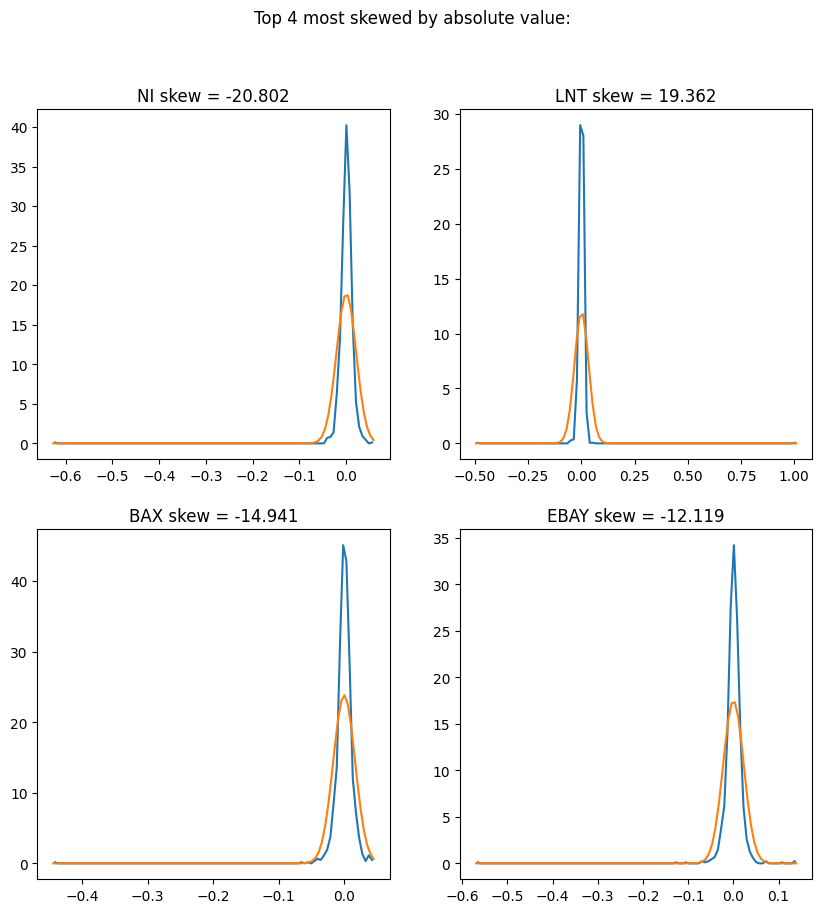

In [33]:
top_n = 4
fig,axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Top {} most skewed by absolute value:'.format(top_n))
#print the top_n most skewed
print('Top {} most skewed:'.format(top_n))
for i, (k, v) in enumerate(sorted(skews.items(), key=lambda x: abs(x[1]), reverse=True)):
    if i < top_n:
        print('{}: {} - {}'.format(i+1, k, v))
        #plot the distribution
        plt.sca(axs[i//2][i%2])
        data = day_to_day_df[k]
        data = data[~np.isnan(data)]
        print(data.shape)
        heights, bins = np.histogram(data, bins=100, density=True)
        plt.plot((bins[:-1]+bins[1:])/2, heights)
        x = np.linspace(np.min(data), np.max(data), 100)
        plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)))
        plt.title(k+" skew = {}".format(str(round(v,3))))
    else:
        break

plt.savefig('figures/top_skew.png')

Top 4 most kurtosis:
1: APTV - 0.5469772374598398
(44,)
2: CBS - 0.9326715939182173
(1259,)
3: HLT - 1.1717738563407787
(276,)
4: ETR - 1.1983993210726585
(1259,)


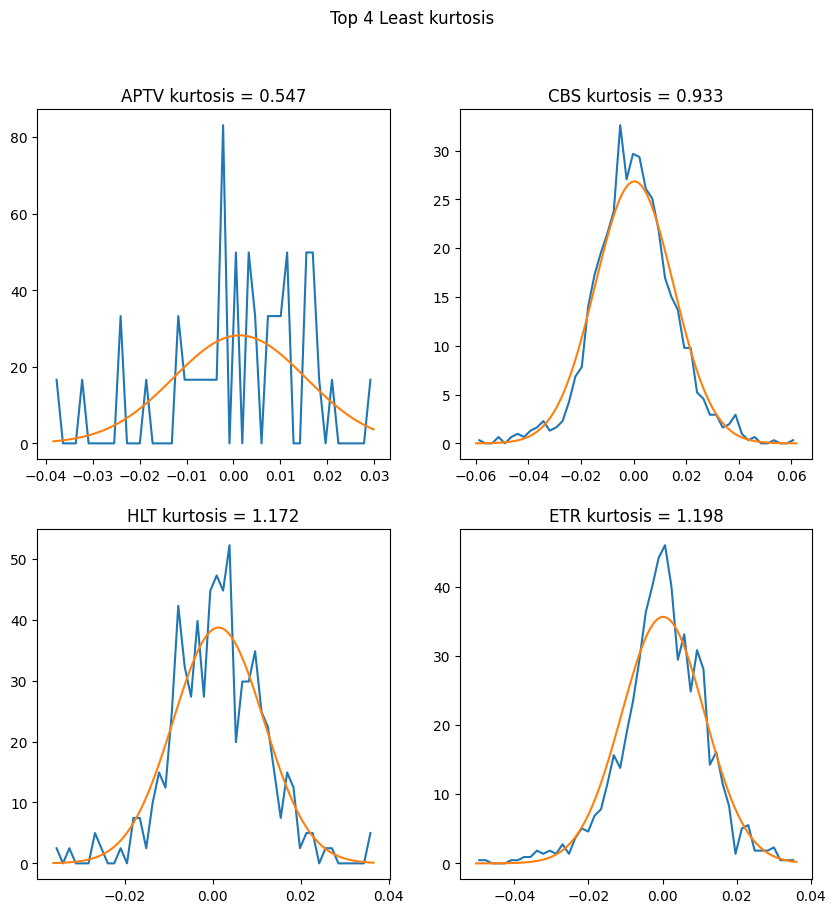

In [34]:
top_n = 4
fig,axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Top {} Least kurtosis'.format(top_n))
#print the top_n most kurtosis
print('Top {} most kurtosis:'.format(top_n))
for i, (k, v) in enumerate(sorted(kurtosis.items(), key=lambda x: abs(x[1]), reverse=False)):
    if i < top_n:
        print('{}: {} - {}'.format(i+1, k, v))
        #plot the distribution
        plt.sca(axs[i//2][i%2])
        data = day_to_day_df[k]
        data = data[~np.isnan(data)]
        print(data.shape)
        heights, bins = np.histogram(data, bins=50, density=True)
        plt.plot((bins[:-1]+bins[1:])/2, heights)
        x = np.linspace(np.min(data), np.max(data), 100)
        plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)))
        plt.title(k+" kurtosis = {}".format(str(round(v,3))))
    else:
        break

plt.savefig('figures/lowest_kurtosis.png')

Top 4 most kurtosis:
1: LNT - 700.6498282631377
(1259,)
2: NI - 615.9369039969239
(1259,)
3: BAX - 393.8154581142772
(1259,)
4: EBAY - 308.55342278081633
(1259,)


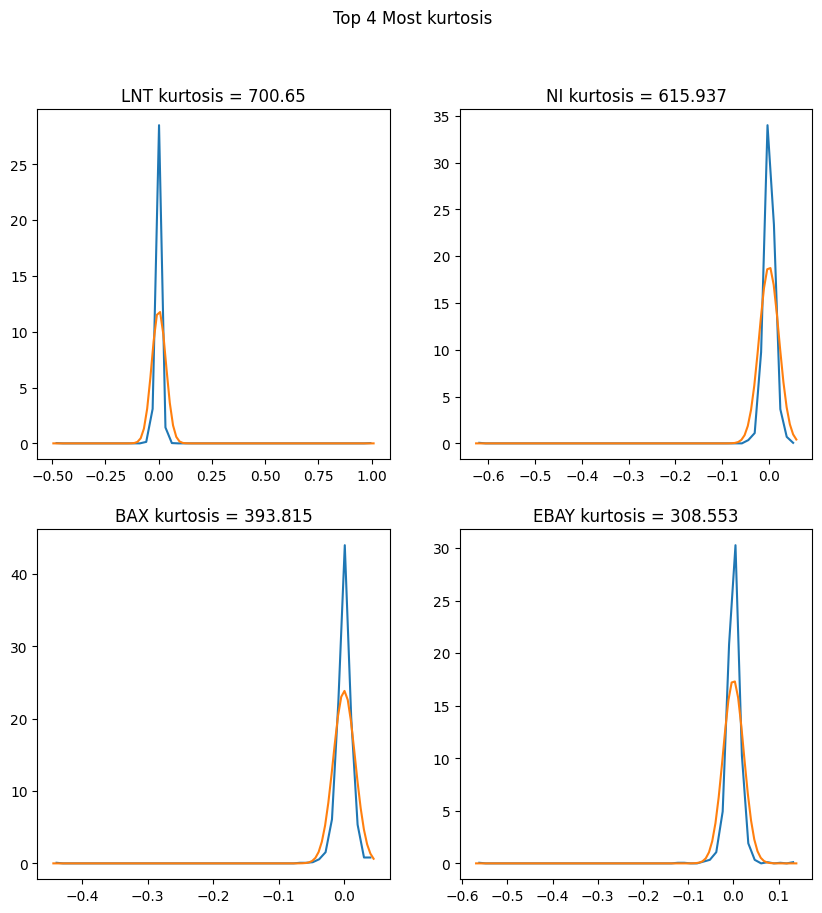

In [36]:
top_n = 4
fig,axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Top {} Most kurtosis'.format(top_n))
#print the top_n most kurtosis
print('Top {} most kurtosis:'.format(top_n))
for i, (k, v) in enumerate(sorted(kurtosis.items(), key=lambda x: abs(x[1]), reverse=True)):
    if i < top_n:
        print('{}: {} - {}'.format(i+1, k, v))
        #plot the distribution
        plt.sca(axs[i//2][i%2])
        data = day_to_day_df[k]
        data = data[~np.isnan(data)]
        print(data.shape)
        heights, bins = np.histogram(data, bins=50, density=True)
        plt.plot((bins[:-1]+bins[1:])/2, heights)
        x = np.linspace(np.min(data), np.max(data), 100)
        plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)))
        plt.title(k+" kurtosis = {}".format(str(round(v,3))))
    else:
        break

plt.savefig('figures/highest_kurtosis.png')